# Psychophysics - Analyse des données

On va faire une regression logistique des données obtenues en psychophysiques, pour chercher le seuil B_theta vers lequel les gens perdent en performances. On le comparera ensuite qualitativement au performances du modèle pour essayer de valider sa plausibilité neurobiologique. 

In [22]:
%ls ./psychophysics_data/Psy_discrim_final*.p

 ./psychophysics_data/Psy_discrim_final_ACT.p
 ./psychophysics_data/Psy_discrim_final_AM.p
 ./psychophysics_data/Psy_discrim_final_BB.p
 ./psychophysics_data/Psy_discrim_final_convo_model_HIRES.p
 ./psychophysics_data/Psy_discrim_final_DL.p
 ./psychophysics_data/Psy_discrim_final_FM.p
 ./psychophysics_data/Psy_discrim_final_HL.p
 ./psychophysics_data/Psy_discrim_final_KB.p
 ./psychophysics_data/Psy_discrim_final_LP.p
 ./psychophysics_data/Psy_discrim_final_MAP.p
 ./psychophysics_data/Psy_discrim_final_MB.p
'./psychophysics_data/Psy_discrim_final_Model - Convo.p'
 ./psychophysics_data/Psy_discrim_final_model_ring_HIRES.p
'./psychophysics_data/Psy_discrim_final_Model - Ring.p'
 ./psychophysics_data/Psy_discrim_final_model_weird_freezing_data.p
 ./psychophysics_data/Psy_discrim_final_MP.p
 ./psychophysics_data/Psy_discrim_final_NP.p
 ./psychophysics_data/Psy_discrim_final_PA.p


En utilisant le modèle de régression logistique de scikit-learn, on fait un modèle pour chaque sujet :

# Tache de discrimination 

In [23]:
import pickle
import matplotlib.pyplot as plt

subj_name_list =  ['Model - Ring']
#['ACT', 'AM', 'BB', 'DL', 'FM', 'HL','KB', 'LP', 'MAP', 'MB', 'MP', 'NP', 'PA']
                  #'Model - Ring','Model - Convo']
                
subj_data_list = []

for subject in subj_name_list :
#   x = pickle.load(open('Psychophys_discrim_2018-06-06_%s.p'%subject, 'rb'))
    x = pickle.load(open('./psychophysics_data/Psy_discrim_final_%s.p'%subject, 'rb'))
    subj_data_list.append(x)

En sujet individuel et en utilisant tout les B_theta:

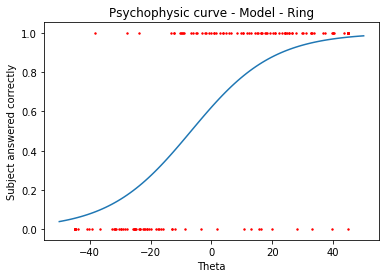

In [24]:
from sklearn.linear_model import LogisticRegression
import numpy as np

#the values used for plotting once the model is built
x_values = np.linspace(-50, 50, 100)
x_plot = np.reshape(x_values, (100,1))

for num, subj_data in enumerate(subj_data_list) :
    X = []
    for i in subj_data :
        #X.append(i[3]*180/np.pi)
        X.append(i[1]*180/np.pi)

    y =[]
    for i in subj_data :
        if False:
            # fitting if correct 
            if np.sign(i[1]) > 0 and i[2] == 'right':
                y.append(1)
            else :
                y.append(0)
            #y.append(i[1])
        else:
            # fitting with direction 
            if i[2] == 'right':
                y.append(1)
            else :
                y.append(0)
            #y.append(i[1])

    
    #reshaped for fitting
    X = np.asarray(X)
    X = X[:,np.newaxis]
    
    #logistic regression
    lgs = LogisticRegression(C = 3, max_iter = 100, penalty = 'l1' ,class_weight = {1 : 1 , 0 : 1}) 
    lgs.fit(X, y)
    #print(lgs.coef_)
    y_values = lgs.predict_proba(x_plot)[:,1]
    plt.plot(x_values, y_values, label = 'LogReg')

    plt.scatter(X, y, c='r', s=2)
    plt.title('Psychophysic curve - %s' % subj_name_list[num])
    plt.xlabel("Theta")
    plt.ylabel("Subject answered correctly")
    #plt.legend()
    plt.show()

En sujet individuel avec une courbe par B_theta :

In [25]:
b_thetas_list = []
for x in subj_data_list[0] :
    b_thetas_list.append(x[3]*180/np.pi)

b_thetas_list = sorted(set(b_thetas_list))
print(b_thetas_list)

[2.8125, 5.011305289539408, 8.929130917321123, 15.90990257669732, 28.34822362263465, 50.51079217392179, 90.0]


Courbe psychophysique - Sujet Model - Ring


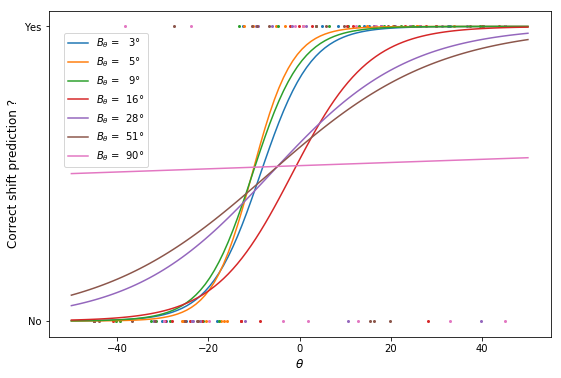

In [26]:
from sklearn.linear_model import LogisticRegression
import numpy as np

#the values used for plotting once the model is built
x_values = np.linspace(-50, 50, 100)
x_plot = np.reshape(x_values, (100,1))

lr_kwargs = dict(solver='liblinear', C = 3, max_iter=1000, penalty='l2', class_weight = {1 : 1 , 0 : 1})

coef_list = []

for num, subj_data in enumerate(subj_data_list) :
    plt.figure(figsize = (9,6))
    for ibtheta, b_theta in enumerate(b_thetas_list):
        X = []
        y =[]

        for i in subj_data :
            if i[3]*180/np.pi == b_theta :
                X.append(i[1]*180/np.pi)
                if False:
                    # fitting if correct 
                    if np.sign(i[1]) > 0 and i[2] == 'right':
                        y.append(1)
                    else :
                        y.append(0)
                    #y.append(i[1])
                else:
                    # fitting with direction 
                    if i[2] == 'right':
                        y.append(1)
                    else :
                        y.append(0)
                    #y.append(i[1])


        #reshaped for fitting
        X = np.asarray(X)
        X = X[:,np.newaxis]

        #logistic regression
        lgs = LogisticRegression(**lr_kwargs) 
        try :
            lgs.fit(X, y)
            coef_list.append((b_theta,lgs.coef_[0][0]))
        
            y_values = lgs.predict_proba(x_plot)[:,1]
            plt.plot(x_values, y_values, label = r'$B_\theta$ = %3.f°' %b_theta)
            plt.scatter(X, y, s=4)
        except :
            pass
        
        
    #plt.title('Courbe psychophysique - Sujet %s' % subj_name_list[num])
    print('Courbe psychophysique - Sujet %s' % subj_name_list[num])
    plt.yticks([0.,1.],['No', 'Yes'])
    plt.xlabel(r'$\theta$', fontsize = 12,)
    plt.ylabel("Correct shift prediction ?", fontsize = 12)
    plt.legend(loc = (0.03, 0.52)) #tuple of axis coordinate is also valid
    
    plt.savefig('./figs/Psychodiscri_curve_subj_%s.pdf' % subj_name_list[num],format='pdf', dpi=1000,
               bbox_inches = 'tight')
    
    plt.show()

# F1 Score

In [27]:
import pickle
import numpy as np
subj_name_list = ['MAP', 'model_weird_freezing_data', 'model_ring_HIRES',
                 #'ACT','AM', 
                  'BB', 'DL', 'FM', 'HL','KB', 'LP', 'MB', 'MP', 'NP', 'PA']
subj_data_list = []
for subject in subj_name_list :
#   x = pickle.load(open('Psychophys_discrim_2018-06-06_%s.p'%subject, 'rb'))
    x = pickle.load(open('./psychophysics_data/Psy_discrim_final_%s.p'%subject, 'rb'))
    subj_data_list.append(x)
    
b_thetas_list = []
for x in subj_data_list[0] :
    b_thetas_list.append(x[3]*180/np.pi)
b_thetas_list = sorted(set(b_thetas_list))

hires_b_thetas_list = []
for x in subj_data_list[1] :
    hires_b_thetas_list.append(x[3]*180/np.pi)
hires_b_thetas_list = sorted(set(hires_b_thetas_list))


In [28]:
import sklearn.metrics as metrics
import pickle
import matplotlib.pyplot as plt

#pas beau en subject average, il doit y avoir des outliers a eliminer
#subj_name_list =  ['ACT', 'AM', 'BB', 'DL', 'FM', 'HL','KB', 'LP', 'MAP', 'MB', 'MP', 'NP', 'PA']


def f1_score(subj_name_list, b_list):
    subj_data_list = []
    for subject in subj_name_list :
    #   x = pickle.load(open('Psychophys_discrim_2018-06-06_%s.p'%subject, 'rb'))
        x = pickle.load(open('./psychophysics_data/Psy_discrim_final_%s.p'%subject, 'rb'))
        subj_data_list.append(x)

    f1_list = []
    #Reminder, trials are in the form of [numtrial, shift angle, answered direction, b_theta]

    #for each b_theta, we loop through all the trials of each subject and we append trials whose b_theta
    #is the one we are currently selecting. We then compute f1 score and append it to a f1 list
    for b_theta in b_list :
        dir_list = []
        answered_list  = []
        for subj in subj_data_list :
            for trials in subj :
                if trials[3]*180/np.pi == b_theta :
                    if trials[2] == 'left' :
                        dir_list.append(0)
                    if trials[2] == 'right':
                        dir_list.append(1)

                    if np.sign(trials[1]) < 0 :
                        answered_list.append(0)
                    if np.sign(trials[1]) > 0 :
                        answered_list.append(1)
        f1_list.append(metrics.f1_score(dir_list, answered_list))
        
    return f1_list

In [29]:
hum_F1_list = []
#for very human (run tag shorter than 5 letters) return a (F1 list, name) tuple
for subj in subj_name_list :
    if len(subj) < 5: 
        #print(subj)
        hum_F1_list.append( (f1_score([subj], b_thetas_list), subj)   )
        
convo_f1 = f1_score(['model_weird_freezing_data'], hires_b_thetas_list)
rnn_f1 = f1_score(['model_ring_HIRES'], hires_b_thetas_list)

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from lmfit.models import LinearModel, RectangleModel,ExpressionModel
from lmfit import Parameters, Parameter

def log_fit(x, y):  # returns a rectangle logfit of the xy
    y = np.asarray(y)
    step_mod = RectangleModel(form='logistic', prefix='step_')
    line_mod = LinearModel(prefix='line_')
    parms = line_mod.make_params(intercept=y.min(), slope=0)
    parms += step_mod.guess(y, x=x, center=2.5)
    mod = step_mod  # + line_mod
    out = mod.fit(y, parms, x=x)
    return out.best_fit

In [31]:
def expr_fit(x, y, x50=45, n=2):  # returns an expression fitting of the x y
    mod = ExpressionModel('1 / (1 + (x/x50)**n) ')
    pars = mod.make_params(x50=x50, n=n)
    out = mod.fit(y, pars, x=x)
    return out.best_fit

In [32]:
def naka_rushton(x, y):  # returns an expression fitting of the x y
    mod = ExpressionModel('1 / ( 1 + (1 /x0**b) * x**b)')
    mod.nan_policy = 'propagate'
    pars = Parameters()
    pars['b'] = Parameter(name = 'b', value = 2, min = 0.01)
    pars['x0'] = Parameter(name = 'x0', value = .8)
    out = mod.fit(y, pars, x=x)
    return out.best_fit

In [33]:
def expr_fit(x, y):  # returns an expression fitting of the x y
    mod = ExpressionModel('1 / ( 1 -amp)  * .5 / (1 + (x/x50)**n) + .5')
    mod.nan_policy = 'propagate'
    pars = Parameters()
    pars['amp'] = Parameter(name = 'amp', value = .8, min = 0.01)
    pars['x50'] = Parameter(name = 'x50', value = 45 )
    pars['n'] = Parameter(name = 'n', value = 2, min = 0.01)
    
    out = mod.fit(y, pars, x=x)
    return out.best_fit

In [34]:
def mega_logistic(x, y):  # logistique quadratique, qui marche
    mod = ExpressionModel('d + (a-d)/(1+(x/c)**b)')
    mod.nan_policy = 'propagate'
    pars = Parameters()
    pars['d'] = Parameter(name = 'ymax', value = .6, min = 0.01)
    pars['a'] = Parameter(name = 'ymin', value = .8, min = .01 )
    pars['b'] = Parameter(name = 'slope', value = 2)
    pars['c'] = Parameter(name = 'xinflection', value = 50, min = 0.01)
    out = mod.fit(y, pars, x=x)
    #print(out.fit_report())
    result = out.minimize()
    #print(confidence.conf_interval(mod, result))
    return out#.best_fit


# One subj

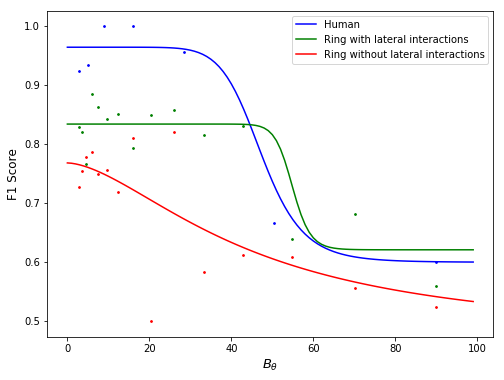

In [35]:
fig, ax = plt.subplots(figsize = (8,6))
#del hum_F1_list[1]
#del hum_F1_list[1]
size = 12
marker = '.'
xs = np.linspace(0,90, 100)


model = mega_logistic(b_thetas_list, hum_F1_list[0][0]) #MAP
vals = model.best_values
#print(vals)

def plot_best_fit(x=xs):
    return vals['d'] + (vals['a']- vals['d'])/(1+(x/vals['c'])**vals['b'])
ax.plot(plot_best_fit(), color = 'b', label = 'Human')
ax.scatter(b_thetas_list, hum_F1_list[0][0], s = size, marker = marker, color = 'b')
#plt.pause(.2)

    

model = mega_logistic(hires_b_thetas_list, rnn_f1)
vals = model.best_values
def plot_best_fit(x=xs):
    return vals['d'] + (vals['a']- vals['d'])/(1+(x/vals['c'])**vals['b'])
ax.plot(plot_best_fit(), color = 'g', label = 'Ring with lateral interactions')
ax.scatter(hires_b_thetas_list, rnn_f1, s = size, marker = marker, color = 'g')

model = mega_logistic(hires_b_thetas_list, convo_f1)
vals = model.best_values
def plot_best_fit(x=xs):
    return vals['d'] + (vals['a']- vals['d'])/(1+(x/vals['c'])**vals['b'])
ax.plot(plot_best_fit(), color = 'r', label = 'Ring without lateral interactions')
ax.scatter(hires_b_thetas_list, convo_f1, s = size, marker = marker, color = 'r')

plt.xlabel(r'$B_\theta$', fontsize = 13)
plt.ylabel('F1 Score', fontsize = 12)
plt.legend()
#plt.title(r'Variation du F1 score en fonction de $B_\theta$')
plt.savefig('./figs/F1_curves_all.pdf',format='pdf', dpi=1000, bbox_inches = 'tight')
plt.show()

# All subjs

In [43]:
len(hum_F1_list)

11

In [47]:
help(cm)

Help on module matplotlib.cm in matplotlib:

NAME
    matplotlib.cm - Builtin colormaps, colormap handling utilities, and the `ScalarMappable` mixin.

DESCRIPTION
    See :doc:`/gallery/color/colormap_reference` for a list of builtin colormaps.
    See :doc:`/tutorials/colors/colormaps` for an in-depth discussion of colormaps.

CLASSES
    builtins.object
        ScalarMappable
    
    class ScalarMappable(builtins.object)
     |  This is a mixin class to support scalar data to RGBA mapping.
     |  The ScalarMappable makes use of data normalization before returning
     |  RGBA colors from the given colormap.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, norm=None, cmap=None)
     |      Parameters
     |      ----------
     |      norm : :class:`matplotlib.colors.Normalize` instance
     |          The normalizing object which scales data, typically into the
     |          interval ``[0, 1]``.
     |          If *None*, *norm* defaults to a *colors.Normali

In [ ]:
from matplotlib.pyplot import cm

fig, ax = plt.subplots(figsize = (8,6))
#del hum_F1_list[1]
#del hum_F1_list[1]
size = 12
marker = '.'
xs = np.linspace(0,90, 100)

color=iter(cm.Blues(np.linspace(.5, 1,10)))

for i,subj in enumerate(hum_F1_list) :
    try :
        model = mega_logistic(b_thetas_list, subj[0])
        vals = model.best_values
        #print(vals)
        def plot_best_fit(x=xs):
            return vals['d'] + (vals['a']- vals['d'])/(1+(x/vals['c'])**vals['b'])
        ax.plot(plot_best_fit(), color = next(color), label = 'Human' if i == 0 else '')
        ax.scatter(b_thetas_list, subj[0], s = size, marker = marker, color = 'b')
        #plt.pause(.2)
    except :
        pass #for some reason i'm getting errors for certain runs, i'll debug the outliers later
    

model = mega_logistic(hires_b_thetas_list, rnn_f1)
vals = model.best_values
def plot_best_fit(x=xs):
    return vals['d'] + (vals['a']- vals['d'])/(1+(x/vals['c'])**vals['b'])
ax.plot(plot_best_fit(), color = 'g', label = 'Ring with lateral interactions')
ax.scatter(hires_b_thetas_list, rnn_f1, s = size, marker = marker, color = 'g')

model = mega_logistic(hires_b_thetas_list, convo_f1)
vals = model.best_values
def plot_best_fit(x=xs):
    return vals['d'] + (vals['a']- vals['d'])/(1+(x/vals['c'])**vals['b'])
ax.plot(plot_best_fit(), color = 'r', label = 'Ring without lateral interactions')
ax.scatter(hires_b_thetas_list, convo_f1, s = size, marker = marker, color = 'r')

plt.xlabel(r'$B_\theta$', fontsize = 13)
plt.ylabel('F1 Score', fontsize = 12)
plt.legend()
#plt.title(r'Variation du F1 score en fonction de $B_\theta$')
plt.savefig('./figs/F1_curves_all.pdf',format='pdf', dpi=1000, bbox_inches = 'tight')
plt.show()

# Average human F1

In [17]:
avg =[]
for subj in hum_F1_list :
    avg.append(subj[0])
    
hum_F1_list = np.mean(avg, axis = 0)

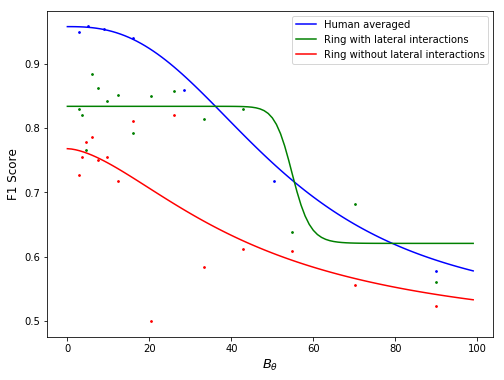

In [18]:
fig, ax = plt.subplots(figsize = (8,6))
#del hum_F1_list[1]
#del hum_F1_list[1]
size = 12
marker = '.'
xs = np.linspace(0,90, 100)


model = mega_logistic(b_thetas_list, hum_F1_list)
vals = model.best_values
#print(vals)

def plot_best_fit(x=xs):
    return vals['d'] + (vals['a']- vals['d'])/(1+(x/vals['c'])**vals['b'])
ax.plot(plot_best_fit(), color = 'b', label = 'Human averaged')
ax.scatter(b_thetas_list, hum_F1_list, s = size, marker = marker, color = 'b')
#plt.pause(.2)


model = mega_logistic(hires_b_thetas_list, rnn_f1)
vals = model.best_values
def plot_best_fit(x=xs):
    return vals['d'] + (vals['a']- vals['d'])/(1+(x/vals['c'])**vals['b'])
ax.plot(plot_best_fit(), color = 'g', label = 'Ring with lateral interactions')
ax.scatter(hires_b_thetas_list, rnn_f1, s = size, marker = marker, color = 'g')

model = mega_logistic(hires_b_thetas_list, convo_f1)
vals = model.best_values
def plot_best_fit(x=xs):
    return vals['d'] + (vals['a']- vals['d'])/(1+(x/vals['c'])**vals['b'])
ax.plot(plot_best_fit(), color = 'r', label = 'Ring without lateral interactions')
ax.scatter(hires_b_thetas_list, convo_f1, s = size, marker = marker, color = 'r')

plt.xlabel(r'$B_\theta$', fontsize = 13)
plt.ylabel('F1 Score', fontsize = 12)
plt.legend()
#plt.title(r'Variation du F1 score en fonction de $B_\theta$')
plt.savefig('./figs/F1_curves_avg.pdf',format='pdf', dpi=1000, bbox_inches = 'tight')
plt.show()

# Coefficient de regression

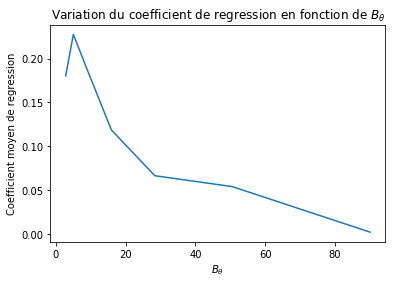

In [19]:
avg_list = []
plt_list = []
for b_theta in b_thetas_list :
    avg_list = []
    for coef in coef_list :
        if coef[0] == b_theta :
            avg_list.append(coef[1])
    plt_list.append(np.mean(avg_list))

plt.plot(b_thetas_list, plt_list)
plt.xlabel(r'$B_\theta$')
plt.ylabel('Coefficient moyen de regression')
plt.title(r'Variation du coefficient de regression en fonction de $B_\theta$')
plt.savefig('./figs/B_theta_curve.pdf',format='pdf', dpi=1000)
plt.show()

# Unused

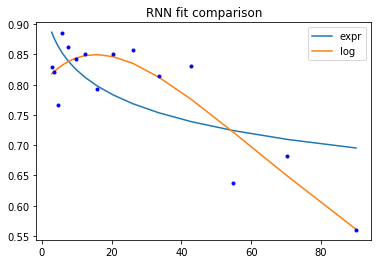

In [20]:
plt_expr = expr_fit(hires_b_thetas_list, rnn_f1)
plt_log = log_fit(hires_b_thetas_list, rnn_f1)

plt.plot(hires_b_thetas_list, plt_expr, label = 'expr')
plt.plot(hires_b_thetas_list, plt_log, label = 'log')
plt.plot(hires_b_thetas_list, rnn_f1, 'b.')
plt.title ('RNN fit comparison')
plt.legend()

In [21]:
plt_expr = expr_fit(b_thetas_list, hum_f1)
plt_log = log_fit(b_thetas_list, hum_f1)

plt.title('Human fit comparison')
plt.plot(b_thetas_list, plt_expr, label = 'expr')
plt.plot(b_thetas_list, plt_log, label = 'log')
plt.plot(b_thetas_list, hum_f1, 'b.')
plt.legend()

NameError: name 'hum_f1' is not defined